# Polynominal regression

## Task

- Load dataset with sizes and prices
- Explore and display the data
- Create a linear model and find out its R2
- Create polynomial models with different degrees, find their R2
- Select the best model 

# Data loading

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA

In [2]:
data = pd.read_csv ("..\dataset\prices.csv",  sep=';')

In [3]:
data=data.dropna()
data.head()

,Size,Price
0,51.00000,901.18810
1,70.36735,972.23867
2,89.73469,1001.99394
3,109.10204,1024.90830
4,128.46939,1053.72491


# Linear model
- standardize the data
- create and train a linear model
- display model parameters
- visualize the linear model
- display model scores

In [4]:
# Estandarización (Z-score scaling)
def rescale(X):
    mean = X.mean()
    std = X.std()
    scaled_X = [(i - mean)/std for i in X]
    return pd.Series(scaled_X)

data_std = pd.DataFrame(columns=data.columns)
for i in data.columns:
    data_std[i] = rescale(data[i])

data_std.describe()

,Size,Price
count,6.200000e+01,6.200000e+01
mean,3.187414e-16,-2.467560e-15
std,1.000000e+00,1.000000e+00
min,-1.690536e+00,-2.877085e+00
25%,-8.452679e-01,-5.836494e-01
50%,1.186304e-08,2.048456e-01
75%,8.452678e-01,8.083945e-01
max,1.690536e+00,1.348537e+00


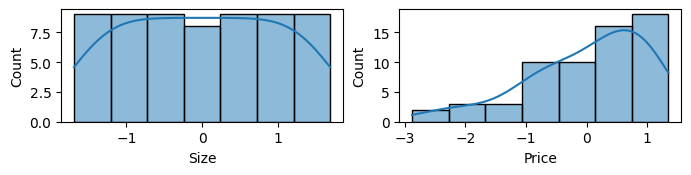

In [5]:
#Visualize the new data
pos = 1
fig = plt.figure(figsize=(8,12))
for i in data_std.columns:
    ax = fig.add_subplot(7,2, pos)
    pos = pos + 1
    sns.histplot(data_std[i],ax=ax, kde=True)

LINEAR MODEL

In [6]:
#Split the data into training and test data and create a linear model
X = pd.DataFrame(np.c_[data['Size']], columns = ['Size'])
Y = data['Price']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [7]:
#Print model parameters
print ("Bias: ", lin_model.intercept_)
print("Váhy: ", lin_model.coef_)

Bias:  1128.6118893860844
Váhy:  [0.29376059]


In [8]:
#Display model score
def print_model_score(Y_train, y_train_predict, label):
    r2 = r2_score(Y_train, y_train_predict)
    rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))    
    print(f"{label} R2 score: {r2}")
    print(f"{label} RMSE: {rmse}")

In [9]:
#Display model score for training data
Y_predicted = lin_model.predict(X_train)
Y_test_predicted = lin_model.predict(X_test)

print_model_score(Y_train, Y_predicted, "Train")

Train R2 score: 0.46019483584346266
Train RMSE: 117.12239750912293


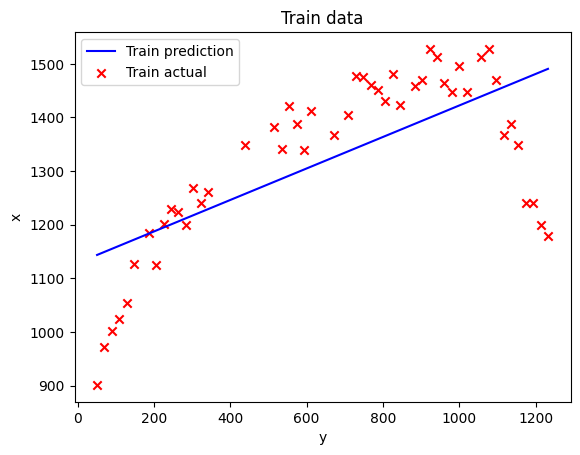

In [10]:
#Visualize the linear model
def visualize_model_2d (X, Y, Y_predicted, title="Linear model", x_label="x", y_label="y"):
    # Asegurarse de que X sea un array 1D
    if hasattr(X, 'values'):
        X = X.values.flatten()
    elif hasattr(X, 'flatten'):
        X = X.flatten()
    elif hasattr(X, 'to_numpy'):
         X = X.to_numpy().flatten()
         
    prediction = np.zeros((X.shape[0], 3))
    prediction[:,0]=X
    prediction[:,1]=Y
    prediction[:,2]=Y_predicted
    prediction=prediction[prediction[:, 0].argsort()]    
            
    fig1 = plt.figure() 
    plt.plot (prediction[:,0], prediction[:,2], c='b', label = "Train prediction")
    plt.scatter (prediction[:,0], prediction[:,1], marker = 'x', c='r', label="Train actual")
    plt.title (title)
    plt.ylabel(x_label)
    plt.xlabel(y_label)
    plt.legend()
    plt.show()

visualize_model_2d(X_train, Y_train, Y_predicted, "Train data")

# Create a polynomial regression model
- create a polynomial 1D model with steps 2 - 8
- display models
- display their parameters
- show their scores
- Which model would you choose?

In [11]:
#I would choose polynomial (degree 2) as it has a higher R2 score.

In [18]:
def polynomial_fit(X, Y, degree = 1):
     # Asegurarse de que X sea un array 1D
    if hasattr(X, 'values'):
        X = X.values.flatten()
    elif hasattr(X, 'flatten'):
        X = X.flatten()
    elif hasattr(X, 'to_numpy'):
         X = X.to_numpy().flatten()
    return np.poly1d(np.polyfit(X, Y, degree))

def visualize_model(p, X_train, Y_train, X_test, Y_test, degree,
                    x_label="Size", y_label="Price"):
    
    X_train = np.array(X_train, dtype=float)
    X_test = np.array(X_test, dtype=float)

    plt.figure()
    plt.scatter(X_train, Y_train, c='r', label="Train")
    plt.scatter(X_test, Y_test, c='b', label="Test")

    curve_x = np.arange(min(X_train), max(X_test), 0.01)
    plt.plot(curve_x, p(curve_x), label=f"Polynomial deg {degree}")

    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title("Model")
    plt.legend()
    plt.show()

C:\Users\Juan\AppData\Local\Temp\ipykernel_5676\4042787054.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  curve_x = np.arange(min(X_train), max(X_test), 0.01)


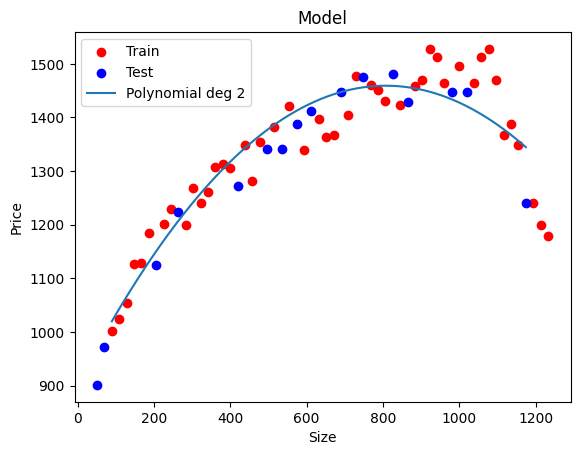

C:\Users\Juan\AppData\Local\Temp\ipykernel_5676\4042787054.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  curve_x = np.arange(min(X_train), max(X_test), 0.01)


Váhy:  [-8.52447594e-04  1.37698143e+00  9.03138264e+02]
Train R2 score: -3.221602826764416
Train RMSE: 280.6770135800442
Test R2 score: -2.1429934980946697
Test RMSE: 305.6035228433047


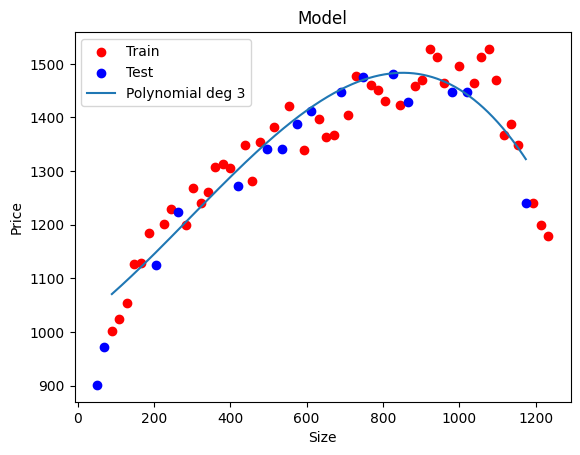

Váhy:  [-7.77367888e-07  6.85118694e-04  5.26166388e-01  1.01845784e+03]
Train R2 score: -10.386662924263833
Train RMSE: 460.96334588417113
Test R2 score: -6.2660857734779425
Test RMSE: 464.6616979630923


C:\Users\Juan\AppData\Local\Temp\ipykernel_5676\4042787054.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  curve_x = np.arange(min(X_train), max(X_test), 0.01)


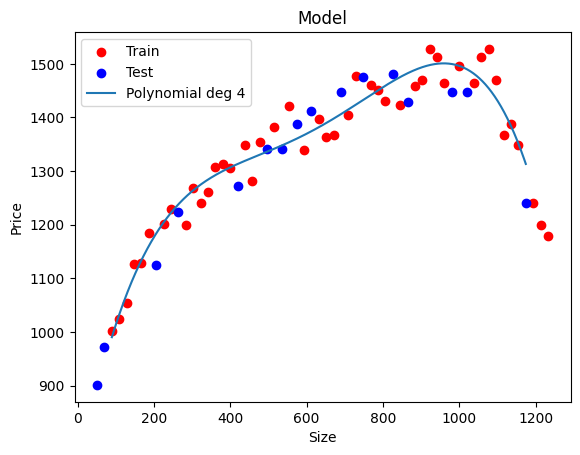

Váhy:  [-4.24518479e-09  1.03993921e-05 -9.07734696e-03  3.69475485e+00
  7.24518968e+02]
Train R2 score: -71.10460085473724
Train RMSE: 1159.9777248762255
Test R2 score: -38.62089521589052
Test RMSE: 1085.0475157434503


C:\Users\Juan\AppData\Local\Temp\ipykernel_5676\4042787054.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  curve_x = np.arange(min(X_train), max(X_test), 0.01)


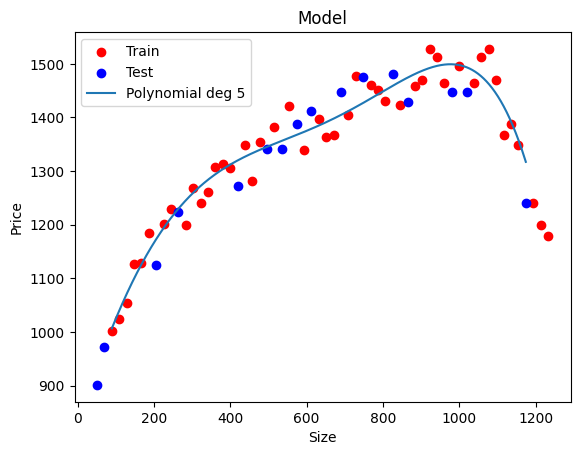

Váhy:  [-2.80051923e-12  5.05850352e-09 -8.88538223e-07 -3.01212640e-03
  2.31697139e+00  8.23349536e+02]
Train R2 score: -114.17629993359596
Train RMSE: 1466.0531731648853
Test R2 score: -60.14768753224233
Test RMSE: 1347.9588480395525


C:\Users\Juan\AppData\Local\Temp\ipykernel_5676\4042787054.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  curve_x = np.arange(min(X_train), max(X_test), 0.01)


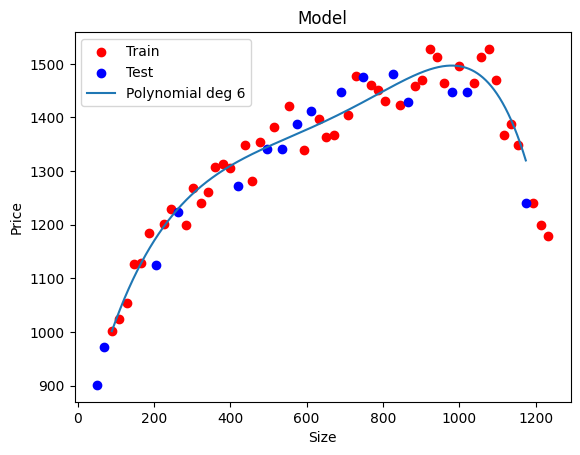

Váhy:  [-2.97230082e-15  9.01185996e-12 -1.31156804e-08  1.27165539e-05
 -8.10949042e-03  3.19285127e+00  7.71883540e+02]
Train R2 score: -152.88630495568873
Train RMSE: 1694.603686413839
Test R2 score: -78.29220956093855
Test RMSE: 1534.9770091517805


C:\Users\Juan\AppData\Local\Temp\ipykernel_5676\4042787054.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  curve_x = np.arange(min(X_train), max(X_test), 0.01)


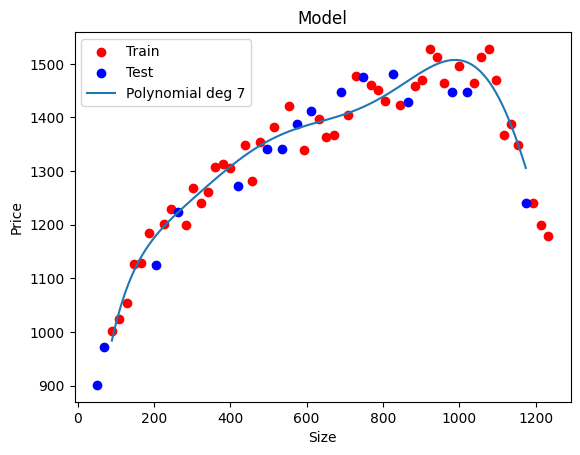

Váhy:  [ 3.92171313e-17 -1.83980936e-13  3.45334954e-10 -3.35013628e-07
  1.81260724e-04 -5.53630386e-02  9.59402556e+00  4.57582215e+02]
Train R2 score: -25.21569282465425
Train RMSE: 699.4373675041668
Test R2 score: -4.1893342094564945
Test RMSE: 392.68330334569595


In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

for degree in range (2, 8):
    p = polynomial_fit(X_train, Y_train, degree)  
    visualize_model (p, X_train, Y_train, X_test, Y_test, degree)    
    print("Váhy: ", p.coef)
    print_model_score(Y_train, p(Y_train), "Train")
    print_model_score(Y_test, p(Y_test), "Test")